<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 머신러닝

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=6292fa18b1d8e859c1e6aa6afa02471b3120990c27acbdd8ca7b5e9cb44b75aa
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


#### Decision Tree 실습 02

two_moon 데이터 결정트리 만들기

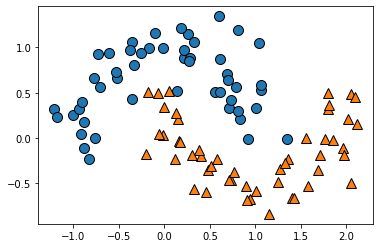

In [ ]:
import mglearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# 훈련/테스트 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
# 데이터 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
# 모델 생성과 학습
from sklearn.tree import DecisionTreeClassifier

# max_depth를 주지 않으면 과대적합 가능성 높음
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# 평가
from sklearn.metrics import accuracy_score
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9333333333333333, 0.88)

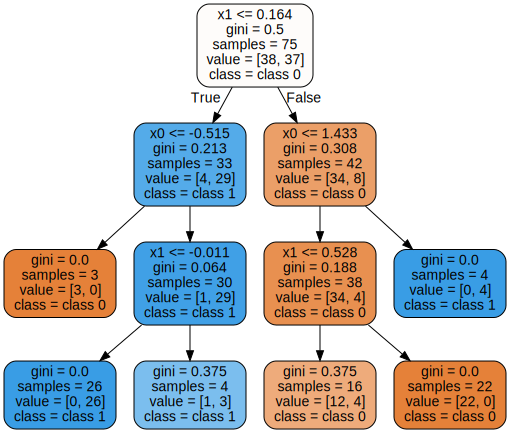

In [ ]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot',
                class_names=['class 0', 'class 1'],
                feature_names=['x0', 'x1'],
                filled=True, rounded=True, impurity=True)
with open('tree.dot') as f:
  dot_graph = f.read()
display( graphviz.Source(dot_graph) )

array([0.363, 0.637])

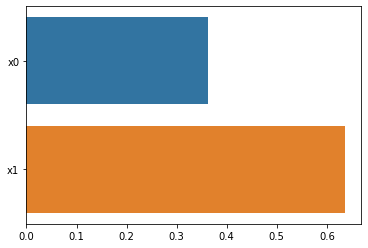

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 트리 특성 중요도
# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=['x0','x1'])
np.round(model.feature_importances_, 3)

#### 분류 결과 시각화

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

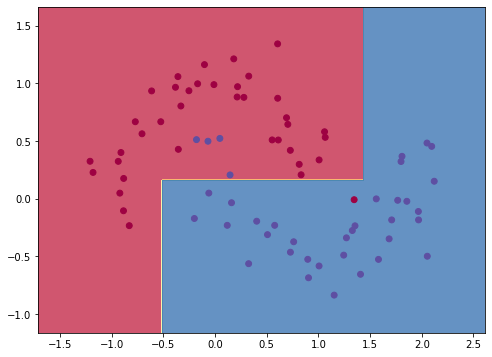

In [ ]:
# 분류 결과 시각화
# mglearn.plots.plot_tree_partition(X_train, y_train, model)
plot_decision_boundary(model, X_train, y_train)
plt.show()

- 결정경계 : 영역을 반복해서 나눠가는 과정에서 정해지기 때문에 직선 형태를 취하지 않음
 - 선형 분리가 불가능한 문제에 유리

- 불순도 (impurity)를 기준으로 가능한 같은 클래스끼리 모이도록 조건 분기 학습
 - 엔트로피(Entropy), 지니계수(Gini coefficient)

#### 의사결정 트리 과정

- 불순도로 Gini 지수를 사용한 경우

 - 지니 불순도

 > ${ G }_{ i }= 1-\sum\limits _{ k=1 }^{ n }{ { p }_{ i,k }^{ 2 }  }  $
 
 > [10, 6] 의 GI :$ G(A)=1-{ (\frac { 10 }{ 16 } ) }^{ 2 } - { (\frac { 6 }{ 16 } ) }^{ 2 }\approx  0.47 $






 - 의사결정나무는 구분 뒤 각 영역의 순도가 증가/불확실성이 최대한 감소하도록 학습

 > \\( GI=\sum\limits _{ i=1 }^{ d }{ { (R }_{ i }(1-\sum\limits _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 })) }  }  \\)

 - \\( { p }_{ k } \\)
: 분리된 집단에서 k집단이 속한 비율,
 - \\( { R }_{ i } \\)
: 전체집단에서 분리된 집단의 비율


○의 GI (적색선으로 분리한 후) : \\( G(A)=0.5 \times (1-{ (\frac { 7 }{ 8 } ) }^{ 2 }-{ (\frac { 1 }{ 8 } ) }^{ 2 } )  + 0.5 \times (1-{ (\frac { 5 }{ 8 } ) }^{ 2 }-{ (\frac { 3 }{ 8 } ) }^{ 2 } ) \approx 0.34 \\)

#### 결정트리 과적합(Overfitting)


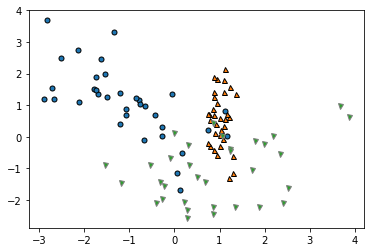

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 
# 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X, y = make_classification(n_features=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=0) 

# plot 형태로 2개의 feature로 2차원 좌표 시각화
# 각 클래스값은 다른 색깔로 표시
mglearn.discrete_scatter(X[:,0], X[:, 1], y, s=5)
plt.show()

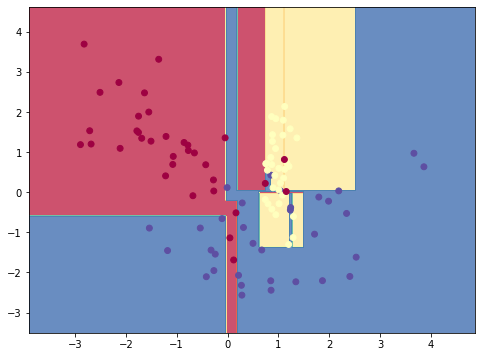

In [ ]:
# 결정기준 경계를 시각화
# 결정트리 생성에 별다른 제약이 없도록 하이퍼 파라미터를 디폴트로 생성
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화
model = DecisionTreeClassifier().fit(X,y)
plot_decision_boundary(model, X, y)

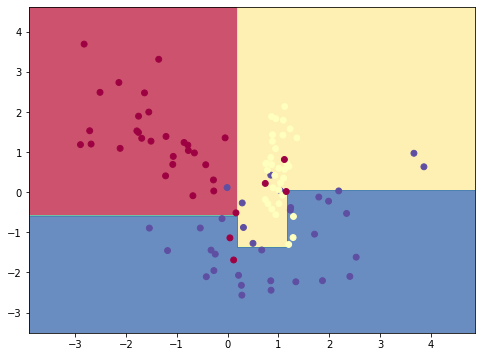

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화
model = DecisionTreeClassifier(min_samples_leaf=10).fit(X, y)
plot_decision_boundary(model, X, y)

#### Decision Tree 실습 03

유방암 데이터에 결정트리 적용 및 사전 가지치기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# stratify : 지정한 Data의 비율을 유지
# 예를 들어, Label Set인 y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
# stratify=y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한채 분할된다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [ ]:
# 모델학습
# 모든 리프 노드가 순수노드이면 훈련 세트 정확도는 100%
model = DecisionTreeClassifier().fit(X_train, y_train)
# 정확도
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.916083916083916)

- 트리의 깊이를 제한하면 과대적합이 줄어듦
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선

In [ ]:
# 사전가지치기
# 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막음
# 1) max_depth=4 : 연속된 질문을 최대 (4)개로 제한
model = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train, y_train)
# 정확도
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

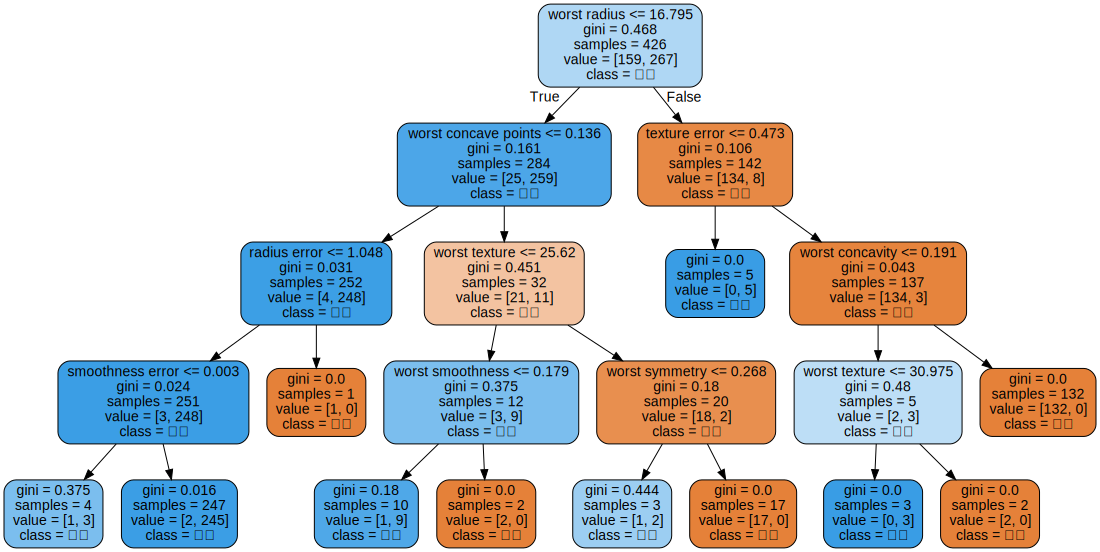

In [ ]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot',
                class_names=['악성', '양성'],
                feature_names=cancer.feature_names,
                filled=True, rounded=True, impurity=True)
with open('tree.dot') as f:
  dot_graph = f.read()
display( graphviz.Source(dot_graph) )


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

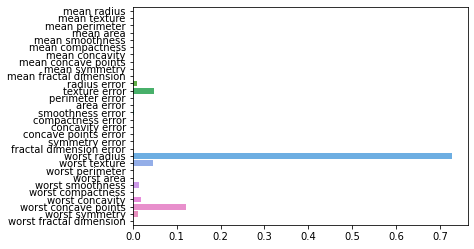

In [ ]:
# 특성 중요도 시각화
# feature importance를 column 별로 시각화 하기 
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)
model.feature_importances_

- 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님

- 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음

# 3. 빅데이터 분석

# 4. 자연어처리

- one hot vector로 단어의 의미를 표현하는 방법의 한계  
  - 유사성을 알 수 없다.
    - 유사도의 개념이 없는 이유 : 

- DTM(count-based), language Models(Prediction-based)는 모두 어떤 가정을 기반으로 고안된 의미표현 방법인가요?
  - 맥락을 통해 의미를 파악할 수 있다. (distributional semantics)

- Distributional Semantics 가정을 하는 의미 표현 방법론(count-based, prediction-based)의 한계 : 편향된 데이터를 학습,,

## Improving DTM with TFIDF
- Term-Frequency Inverse Document-Frequency
- DTM과 같은 단순 빈도수 기반 방법론의 문제 : 중요한 단어와 불필요한 단어를 구분하지 못한다.
- 문서를 대변하는 단어에(더 중요한) 가중치를 더 부여하는 방법 TFIDF weighting
- TFIDF(t,d) = TF(t, d) * IDF(t)
  - TF(t,d) = d에서 t가 출현하는 빈도
  - TFIDF의 값은 tf(d, t)에 비례한다.
  - 즉 d에 t가 많이 출현할수록 TFIDF의 값이 높아진다.

- DF(t) = 특정 단어 t가 등장한 문서의 수
  - 각 문서에 t가 몇번 등장했는지는 관심x, 오직 t가 등장한 문서의 수에만 관심을 가진다.

- IDF(t) = DF의 'Inverse', 즉 DF를 역수 취해준 것
  - 역수를 취하는 이유? 흔하지 않은 단어일수록 해당 문서를 대변한다고 가정하기 때문에..
  - Log를 씌우는 이유? Log를 씌우지 않으면, 흔하지 않은 단어에 부여되는 가중치가 너무 커져서
  - 1을 더하는 이유? DF(t)=0인 경우, division by zero를 방지하기 위해서.
- TFIDF의 값은 tf(d,t)에 비례한다.
- 즉 d에 t가 더 많이 출현할수록 TFIDF의 값이 높아진다.
- TFIDF의 값은 idf(t)에 비례한다.
- 즉 t가 흔하지 않은 단어일수록 TFIDF의 값이 높아진다.
- 결론적으로 t가 흔하지 않은 단어이면서, d에선 유독 많이 출현한다. -> d를 대변하는 단어일 가능성이 높다 -> TFIDF가 높다.
